<a href="https://colab.research.google.com/github/VishalRavichandran27/hds5210-2023/blob/main/final/finaldummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
from re import M
measuring = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
measuring.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [85]:
measuring['Bmi'] = round(measuring['Weight']/(measuring['Height']*0.01)**2)

In [86]:
measuring

,Gender,Height,Weight,Index,Bmi
0,Male,174,96,4,32.0
1,Male,189,87,2,24.0
2,Female,185,110,4,32.0
3,Female,195,104,3,27.0
4,Male,149,61,3,27.0
...,...,...,...,...,...
495,Female,150,153,5,68.0
496,Female,184,121,4,36.0
497,Female,141,136,5,68.0
498,Male,150,95,5,42.0


In [87]:
measuring = measuring.drop(columns = ['Index'])

In [88]:
measuring

,Gender,Height,Weight,Bmi
0,Male,174,96,32.0
1,Male,189,87,24.0
2,Female,185,110,32.0
3,Female,195,104,27.0
4,Male,149,61,27.0
...,...,...,...,...
495,Female,150,153,68.0
496,Female,184,121,36.0
497,Female,141,136,68.0
498,Male,150,95,42.0


In [89]:
import requests
dia = requests.get('https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded')
# dia = pd.DataFrame(dia.text.split('\r')[1:-1],columns =dia.text.split('\r')[0])
df= []
for i in dia.text.split('\r')[1:-1]:
  i = i.split(',')
  df.append(i)
diabetes = pd.DataFrame(df, columns = dia.text.split('\r')[0].split(','))
# diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
4,504,34223,M,33,7.1,46,4.9,4.9,1,0.8,2,0.4,21,N


In [90]:
diabetes = diabetes.rename(str.title, axis = 'columns')

In [91]:
diabetes['Age'] = diabetes['Age'].astype(int)
diabetes['Bmi'] = diabetes['Bmi'].astype(float)

In [92]:
diabetes

,Id,No_Pation,Gender,Age,Urea,Cr,Hba1C,Chol,Tg,Hdl,Ldl,Vldl,Bmi,Class
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1,0.8,2,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11,97,7,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2,1.6,2.9,14,40.5,Y


In [93]:
diabetes_female = diabetes[diabetes['Gender']=='F']
diabetes_male = diabetes[diabetes['Gender']=='M']
diabetes_female['Gender'] = 'Female'
diabetes_male['Gender'] = 'Male'
gender = [diabetes_male,diabetes_female]
diabetes = pd.concat(gender,axis =0)
diabetes

<ipython-input-93-b8b822c2dc3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_female['Gender'] = 'Female'
<ipython-input-93-b8b822c2dc3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_male['Gender'] = 'Male'


,Id,No_Pation,Gender,Age,Urea,Cr,Hba1C,Chol,Tg,Hdl,Ldl,Vldl,Bmi,Class
1,735,34221,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
4,504,34223,Male,33,7.1,46,4.9,4.9,1,0.8,2,0.4,21.0,N
7,421,34227,Male,48,4.7,47,4,2.9,0.8,0.9,1.6,0.4,24.0,N
8,670,34229,Male,43,2.6,67,4,3.8,0.9,2.4,3.7,1,21.0,N
15,566,34236,Male,50,5.5,74,5,3.6,1.1,1,2.1,0.5,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,177,45364,Female,20,4.6,70,9.6,4.1,1.8,1,2.3,0.8,30.0,Y
982,184,454316,Female,54,5,88,6.8,5.1,2.1,1.1,3,1,30.0,Y
984,187,454316,Female,60,5,70,8.1,5.2,3.3,1.4,0.6,3,27.0,Y
985,188,454316,Female,75,10.3,113,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y


In [94]:
diabetes = diabetes.merge(measuring, how = 'inner', on = ['Bmi','Gender'])

In [98]:
diabetes.Class.unique()

array(['N', 'P', 'Y', 'Y '], dtype=object)

In [99]:
dia1 = diabetes[diabetes['Class'] !='Y ']
dia2 = diabetes[diabetes['Class'] =='Y ']
dia2['Class'] = 'Y'
dia = [dia1,dia2]
diabetes = pd.concat(dia, axis = 0)

<ipython-input-99-4c129084ff63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dia2['Class'] = 'Y'


In [100]:
diabetes['Class'].value_counts()

Y    5018
N     603
P     297
Name: Class, dtype: int64

In [101]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
diabetes.head()

,Id,No_Pation,Gender,Age,Urea,Cr,Hba1C,Chol,Tg,Hdl,Ldl,Vldl,Bmi,Class,Height,Weight
0,735,34221,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,157,56
1,735,34221,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,190,83
2,735,34221,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,180,75
3,735,34221,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,154,54
4,735,34221,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,180,73


In [106]:
heart.columns = ['Age', 'Gender', 'Chest_pain', 'Systole', 'Cholesterol', 'Diabetes', 'Resting_ECG','Max_HR', 'Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Heart_Disease' ]

In [107]:
heart.head()

,Age,Gender,Chest_pain,Systole,Cholesterol,Diabetes,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Conversion formulas:
mg/dl × 0.0555 = mmol/l; mmol/l × 18.018 = mg/dl. Included under terms of UK Non-commercial Government License.

In [109]:
heart['Cholesterol'] = round(heart['Cholesterol']*0.0555,1)

In [110]:
heart

,Age,Gender,Chest_pain,Systole,Cholesterol,Diabetes,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal,Heart_Disease
0,63,1,3,145,12.9,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,13.9,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,11.3,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,13.1,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,19.6,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,13.4,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,14.7,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,10.7,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,7.3,0,1,115,1,1.2,1,1,3,0


In [111]:
heart_female = heart[heart['Gender']==0]
heart_male = heart[heart['Gender']==1]
heart_female['Gender'] = 'Female'
heart_male['Gender'] = 'Male'
gender = [heart_male,heart_female]
heart = pd.concat(gender,axis =0)
heart

<ipython-input-111-fb95a3953479>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_female['Gender'] = 'Female'
<ipython-input-111-fb95a3953479>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_male['Gender'] = 'Male'


,Age,Gender,Chest_pain,Systole,Cholesterol,Diabetes,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal,Heart_Disease
0,63,Male,3,145,12.9,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,13.9,0,1,187,0,3.5,0,0,2,1
3,56,Male,1,120,13.1,0,1,178,0,0.8,2,0,2,1
5,57,Male,0,140,10.7,0,1,148,0,0.4,1,0,1,1
7,44,Male,1,120,14.6,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,Female,0,128,11.4,0,2,130,1,2.0,1,1,3,0
292,58,Female,0,170,12.5,1,0,146,1,2.8,1,2,1,0
296,63,Female,0,124,10.9,0,1,136,1,0.0,1,0,2,0
298,57,Female,0,140,13.4,0,1,123,1,0.2,1,0,3,0


<Axes: xlabel='Age', ylabel='Cholesterol'>

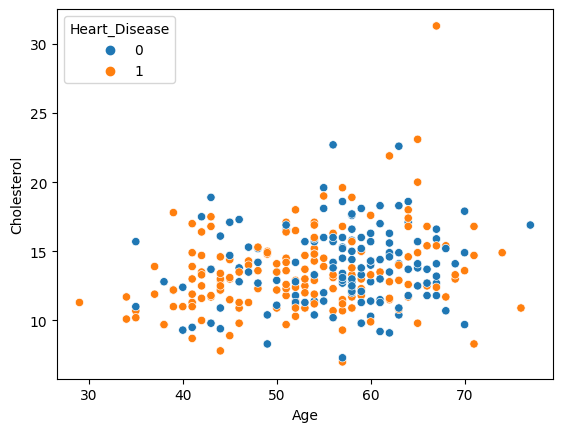

In [112]:
sns.scatterplot(x = heart['Age'], y = heart['Cholesterol'],hue = heart['Heart_Disease'])

In [116]:
diabetes.columns = ['Id', 'No_Pation', 'Gender', 'Age', 'Urea', 'Cr', 'Hba1C', 'Cholesterol', 'Tg',
       'Hdl', 'Ldl', 'Vldl', 'Bmi', 'Diabetes', 'Height', 'Weight']

In [120]:
diabetes["cholesterol"] = diabetes.Cholesterol.astype(float)

In [121]:
diabetes = diabetes.merge(heart, how = 'inner', on = ['Age','Gender', 'Diabetes', 'Cholesterol']).sort_values(by = 'Hba1C_Level')
diabetes

ValueError: ignored

In [30]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 275 to 2627
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               2655 non-null   object 
 1   Age                  2655 non-null   int64  
 2   Hypertension         2655 non-null   int64  
 3   Heart_Disease        2655 non-null   int64  
 4   Smoking_History      2655 non-null   object 
 5   Bmi                  2655 non-null   float64
 6   Hba1C_Level          2655 non-null   float64
 7   Blood_Glucose_Level  2655 non-null   int64  
 8   Diabetes             2655 non-null   int64  
 9   Height               2655 non-null   int64  
 10  Weight               2655 non-null   int64  
 11  Chest_pain           2655 non-null   int64  
 12  Systole              2655 non-null   int64  
 13  Cholesterol          2655 non-null   int64  
 14  Resting_ECG          2655 non-null   int64  
 15  Max_HR               2655 non-null  

In [31]:
diabetes = diabetes.drop(columns = 'Smoking_History')

In [32]:
diabetes

,Gender,Age,Hypertension,Heart_Disease,Bmi,Hba1C_Level,Blood_Glucose_Level,Diabetes,Height,Weight,Chest_pain,Systole,Cholesterol,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal
275,Female,57,0,0,27.47,3.5,80,0,185,94,0,140,241,1,123,1,0.2,1,0,3
1768,Male,53,0,0,31.40,3.5,145,0,182,104,0,123,282,1,95,1,2.0,1,2,3
1615,Male,52,0,0,29.38,3.5,155,0,165,80,0,128,255,1,161,1,0.0,2,1,3
1616,Male,52,0,0,29.38,3.5,155,0,165,80,0,112,230,1,160,0,0.0,2,1,2
985,Male,60,0,0,22.14,3.5,160,0,166,61,0,130,206,0,132,1,2.4,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,Male,57,0,0,35.34,8.8,240,1,174,107,0,165,289,0,124,0,1.0,1,3,3
2530,Female,56,0,0,26.31,9.0,126,1,187,92,0,200,288,0,133,1,4.0,0,2,3
2617,Male,59,0,0,40.02,9.0,130,1,191,146,2,126,218,1,134,0,2.2,1,1,1
2618,Male,59,0,0,40.02,9.0,130,1,191,146,0,164,176,0,90,0,1.0,1,2,1


In [33]:
diabetes = diabetes[['Gender', 'Age', 'Height', 'Weight','Bmi', 'Max_HR', 'Systole','Hypertension', 'Cholesterol', 'Blood_Glucose_Level','Hba1C_Level',
          'Resting_ECG','Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Chest_pain', 'Diabetes', 'Heart_Disease']].reset_index()
del diabetes['index']
diabetes

,Gender,Age,Height,Weight,Bmi,Max_HR,Systole,Hypertension,Cholesterol,Blood_Glucose_Level,Hba1C_Level,Resting_ECG,Exercise_angina,Oldpeak,Slope,CA,Thal,Chest_pain,Diabetes,Heart_Disease
0,Female,57,185,94,27.47,123,140,0,241,80,3.5,1,1,0.2,1,0,3,0,0,0
1,Male,53,182,104,31.40,95,123,0,282,145,3.5,1,1,2.0,1,2,3,0,0,0
2,Male,52,165,80,29.38,161,128,0,255,155,3.5,1,1,0.0,2,1,3,0,0,0
3,Male,52,165,80,29.38,160,112,0,230,155,3.5,1,0,0.0,2,1,2,0,0,0
4,Male,60,166,61,22.14,132,130,0,206,160,3.5,0,1,2.4,1,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,Male,57,174,107,35.34,124,165,0,289,240,8.8,0,0,1.0,1,3,3,0,1,0
2651,Female,56,187,92,26.31,133,200,0,288,126,9.0,0,1,4.0,0,2,3,0,1,0
2652,Male,59,191,146,40.02,134,126,0,218,130,9.0,1,0,2.2,1,1,1,2,1,0
2653,Male,59,191,146,40.02,90,164,0,176,130,9.0,0,0,1.0,1,2,1,0,1,0


<Axes: xlabel='Age'>

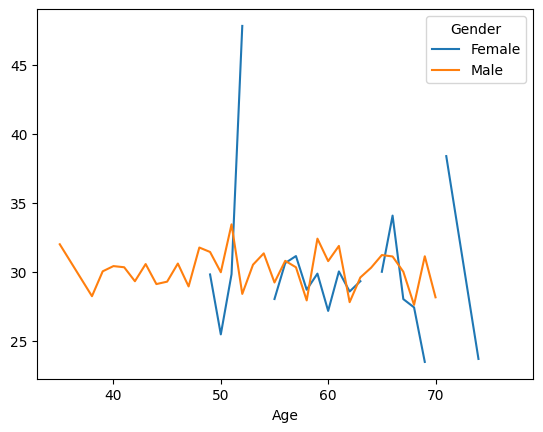

In [34]:
pivot_data = diabetes.pivot_table(values='Bmi', index='Age', columns='Gender', aggfunc='mean')
pivot_data.plot()

In [35]:
diabetes.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Bmi', 'Max_HR', 'Systole',
       'Hypertension', 'Cholesterol', 'Blood_Glucose_Level', 'Hba1C_Level',
       'Resting_ECG', 'Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal',
       'Chest_pain', 'Diabetes', 'Heart_Disease'],
      dtype='object')

In [36]:
pivoted_data = diabetes.pivot_table(values=['Bmi', 'Age', 'Cholesterol'], index='Heart_Disease', aggfunc='')
pivoted_data.plot(kind='bar')

AttributeError: ignored

In [55]:
import requests
dia = requests.get('https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded')
# dia = pd.DataFrame(dia.text.split('\r')[1:-1],columns =dia.text.split('\r')[0])
df= []
for i in dia.text.split('\r')[1:-1]:
  i = i.split(',')
  df.append(i)
dia = pd.DataFrame(df, columns = dia.text.split('\r')[0].split(','))

In [56]:
dia

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24,N
4,504,34223,M,33,7.1,46,4.9,4.9,1,0.8,2,0.4,21,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11,97,7,7.5,1.7,1.2,1.8,0.6,30,Y
996,671,876534,M,31,3,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2,1.6,2.9,14,40.5,Y
